In [1]:
# prompt: google drive mount

#from google.colab import drive
#drive.mount('/content/drive')
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# prompt: read drive dataset


# Replace 'your_file_path' with the actual path to your dataset in Google Drive
df = pd.read_csv('Final_Data_Without_Social_Det_v6.csv')

df.head()


,id,num_of_chronic_conditions,preventive_visit_gap_ind,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,...,riskarr_rewards,riskarr_global,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,atlas_ffrpth14,atlas_povertyallagespct,cci_score,fci_score,dcsi_score,age_Tile_Num
0,1787899,-1,1,4,0,4,1,13,1,0.0,...,0.0,0.0,352.01,141.53,0.757700,13.6,4.0,5.0,0.0,6
1,1097519,2,0,6,0,5,0,2,0,0.0,...,0.0,0.0,1071.83,0.00,0.699909,11.0,5.0,2.0,1.0,7
2,1284744,-1,1,0,0,0,0,0,0,NaN,...,0.0,0.0,366.70,115.83,0.711179,14.3,3.0,0.0,0.0,7
3,1012315,-1,0,2,1,2,1,3,1,NaN,...,0.0,0.0,520.07,80.29,0.477846,26.6,4.0,0.0,0.0,8
4,279911,-1,1,10,3,2,1,2,1,NaN,...,0.0,0.0,818.84,309.52,0.560579,18.3,4.0,1.0,0.0,8


In [4]:
df.columns

Index(['id', 'num_of_chronic_conditions', 'preventive_visit_gap_ind',
       'measure_name_lag3', 'dissatisfaction_cnt_2020', 'measure_name_lag2',
       'dissatisfaction_cnt_2021', 'measure_name_lag1',
       'dissatisfaction_cnt_2022', 'PV_PREV_YR', 'all_mm_tenure',
       'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_grouped',
       'sex_cd', 'age', 'veteran_ind', 'mco_contract_nbr', 'pbp_segment_id',
       'region', 'race', 'total_ip_health_issues_admit_days_pmpm',
       'nonpar_allowed_pmpm_cost', 'total_allowed_pmpm_cost',
       'nonpar_clm_ct_pmpm', 'nonpar_coins_pmpm_cost', 'total_coins_pmpm_cost',
       'nonpar_cob_paid_pmpm_cost', 'total_cob_paid_pmpm_cost',
       'nonpar_copay_pmpm_cost', 'total_copay_pmpm_cost', 'nonpar_ds_clm',
       'days_since_last_clm', 'nonpar_deduct_pmpm_cost',
       'total_deduct_pmpm_cost', 'nonpar_mbr_resp_pmpm_cost',
       'total_mbr_resp_pmpm_cost', 'nonpar_net_paid_pmpm_cost',
       'total_net_paid_pmpm_cost', 'rx_days_s

In [5]:
if 'age_Tile_Num' in df.columns:
    df.drop('age_Tile_Num', axis = 1, inplace = True)

In [6]:

for i in df.columns:
  print(df[[i]].isnull().sum())


id    0
dtype: int64
num_of_chronic_conditions    0
dtype: int64
preventive_visit_gap_ind    0
dtype: int64
measure_name_lag3    0
dtype: int64
dissatisfaction_cnt_2020    0
dtype: int64
measure_name_lag2    0
dtype: int64
dissatisfaction_cnt_2021    0
dtype: int64
measure_name_lag1    0
dtype: int64
dissatisfaction_cnt_2022    0
dtype: int64
PV_PREV_YR    198803
dtype: int64
all_mm_tenure    0
dtype: int64
dual_eligible_ind    0
dtype: int64
disabled_ind    0
dtype: int64
lis_ind    0
dtype: int64
tenure_band_grouped    0
dtype: int64
sex_cd    0
dtype: int64
age    0
dtype: int64
veteran_ind    0
dtype: int64
mco_contract_nbr    0
dtype: int64
pbp_segment_id    0
dtype: int64
region    17
dtype: int64
race    0
dtype: int64
total_ip_health_issues_admit_days_pmpm    511
dtype: int64
nonpar_allowed_pmpm_cost    511
dtype: int64
total_allowed_pmpm_cost    511
dtype: int64
nonpar_clm_ct_pmpm    511
dtype: int64
nonpar_coins_pmpm_cost    511
dtype: int64
total_coins_pmpm_cost    511
dtype

In [7]:
ndf = df

In [8]:
#"consec_tenure_month",
ndf.drop(columns = ['atlas_ffrpth14', 'atlas_povertyallagespct', "total_net_paid_pmpm_cost", 
                    "nonpar_net_paid_pmpm_cost", "nonpar_mbr_resp_pmpm_cost", 
                   "rx_overall_mbr_resp_pmpm_cost", 'rx_all_tiers_pmpm_ct', 'rx_overall_dist_gpi6_pmpm_ct',
                   "login_count_0", "login_count_1", "login_pmpm_ct", "lag_six_months",
                    'tenure_band_grouped', 'lis_ind', # MEMBER DATA
                   ], axis =1 , inplace=True)

In [9]:
# prompt: PV_PREV_YR replace nulls with -1

# Replace null values in 'PV_PREV_YR' with -1
ndf['PV_PREV_YR'].fillna(0, inplace=True)

# Verify that null values have been filled
print(ndf[['PV_PREV_YR']].isnull().sum())


PV_PREV_YR    0
dtype: int64


In [10]:

for i in ndf.columns:
  print(ndf[[i]].isnull().sum())

id    0
dtype: int64
num_of_chronic_conditions    0
dtype: int64
preventive_visit_gap_ind    0
dtype: int64
measure_name_lag3    0
dtype: int64
dissatisfaction_cnt_2020    0
dtype: int64
measure_name_lag2    0
dtype: int64
dissatisfaction_cnt_2021    0
dtype: int64
measure_name_lag1    0
dtype: int64
dissatisfaction_cnt_2022    0
dtype: int64
PV_PREV_YR    0
dtype: int64
all_mm_tenure    0
dtype: int64
dual_eligible_ind    0
dtype: int64
disabled_ind    0
dtype: int64
sex_cd    0
dtype: int64
age    0
dtype: int64
veteran_ind    0
dtype: int64
mco_contract_nbr    0
dtype: int64
pbp_segment_id    0
dtype: int64
region    17
dtype: int64
race    0
dtype: int64
total_ip_health_issues_admit_days_pmpm    511
dtype: int64
nonpar_allowed_pmpm_cost    511
dtype: int64
total_allowed_pmpm_cost    511
dtype: int64
nonpar_clm_ct_pmpm    511
dtype: int64
nonpar_coins_pmpm_cost    511
dtype: int64
total_coins_pmpm_cost    511
dtype: int64
nonpar_cob_paid_pmpm_cost    511
dtype: int64
total_cob_paid_

In [11]:
ndf.shape

(1527904, 66)

In [12]:
ndf.rucc_category.value_counts()

rucc_category
1-Metro       463353
2-Metro       364590
3-Metro       230472
6-Nonmetro    161116
4-Nonmetro    124668
7-Nonmetro     81417
5-Nonmetro     42660
8-Nonmetro     30477
9-Nonmetro     28612
Name: count, dtype: int64

In [13]:
ndf["rucc_category_enc"] = ndf["rucc_category"].replace({"1-Metro":1, "2-Metro":1,"3-Metro":1, "4-Nonmetro": 1, "5-Nonmetro": 0, "6-Nonmetro": 0, "7-Nonmetro": 0, "8-Nonmetro": 0, "9-Nonmetro": 0})



In [14]:
ndf.drop(columns="rucc_category", axis = 1, inplace = True)

In [15]:
ndf.shape

(1527904, 66)

In [16]:
ndf.columns

Index(['id', 'num_of_chronic_conditions', 'preventive_visit_gap_ind',
       'measure_name_lag3', 'dissatisfaction_cnt_2020', 'measure_name_lag2',
       'dissatisfaction_cnt_2021', 'measure_name_lag1',
       'dissatisfaction_cnt_2022', 'PV_PREV_YR', 'all_mm_tenure',
       'dual_eligible_ind', 'disabled_ind', 'sex_cd', 'age', 'veteran_ind',
       'mco_contract_nbr', 'pbp_segment_id', 'region', 'race',
       'total_ip_health_issues_admit_days_pmpm', 'nonpar_allowed_pmpm_cost',
       'total_allowed_pmpm_cost', 'nonpar_clm_ct_pmpm',
       'nonpar_coins_pmpm_cost', 'total_coins_pmpm_cost',
       'nonpar_cob_paid_pmpm_cost', 'total_cob_paid_pmpm_cost',
       'nonpar_copay_pmpm_cost', 'total_copay_pmpm_cost', 'nonpar_ds_clm',
       'days_since_last_clm', 'nonpar_deduct_pmpm_cost',
       'total_deduct_pmpm_cost', 'total_mbr_resp_pmpm_cost',
       'rx_days_since_last_script', 'rx_overall_coins_copay_cost',
       'rx_overall_deduct_pmpm_cost', 'rx_overall_pmpm_cost',
       'rx_over

In [17]:
ndf.isna().sum()

id                               0
num_of_chronic_conditions        0
preventive_visit_gap_ind         0
measure_name_lag3                0
dissatisfaction_cnt_2020         0
                             ...  
cms_tot_partd_payment_amt    19736
cci_score                      511
fci_score                      511
dcsi_score                     511
rucc_category_enc              539
Length: 66, dtype: int64

In [18]:
# prompt: replace Unknown with blank

ndf.replace('Unknown', "UNKNOWN", inplace=True)


In [19]:
# prompt: one hot encoding for race

# Perform one-hot encoding for the 'race' column
race_encoded = pd.get_dummies(ndf['race'], prefix='race', drop_first=True, dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
ndf = pd.concat([ndf, race_encoded], axis=1)

# Drop the original 'race' column if you no longer need it
ndf = ndf.drop('race', axis=1)

# Print the updated DataFrame to verify the changes
ndf.head()


,id,num_of_chronic_conditions,preventive_visit_gap_ind,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,...,cci_score,fci_score,dcsi_score,rucc_category_enc,race_BLACK,race_HISPANIC,race_N AMERICAN NATIVE,race_OTHER,race_UNKNOWN,race_WHITE
0,1787899,-1,1,4,0,4,1,13,1,0.0,...,4.0,5.0,0.0,1.0,0,0,0,0,1,0
1,1097519,2,0,6,0,5,0,2,0,0.0,...,5.0,2.0,1.0,1.0,0,0,0,0,0,1
2,1284744,-1,1,0,0,0,0,0,0,0.0,...,3.0,0.0,0.0,0.0,0,0,0,0,1,0
3,1012315,-1,0,2,1,2,1,3,1,0.0,...,4.0,0.0,0.0,1.0,0,0,0,0,0,1
4,279911,-1,1,10,3,2,1,2,1,0.0,...,4.0,1.0,0.0,1.0,0,0,0,0,1,0


In [20]:
ndf.region.value_counts()

region
Southeast            375041
Midwest              342669
South Central        169298
Central              157155
Northeast            114090
Florida              111079
Gulf South           102356
Pacific Southwest    101035
Intermountain         54718
Puerto Rico             446
Name: count, dtype: int64

In [21]:
# prompt: replace Florida with Gulf South for region and perform one hot encoding on region

# Replace 'Florida' with 'Gulf South' in the 'region' column
ndf['region'] = ndf['region'].replace('Florida', 'Gulf South')

# Perform one-hot encoding for the 'region' column
region_encoded = pd.get_dummies(ndf['region'], prefix='region', drop_first=True, dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
ndf = pd.concat([ndf, region_encoded], axis=1)

# Drop the original 'region' column if you no longer need it
ndf = ndf.drop('region', axis=1)

# Print the updated DataFrame to verify the changes
ndf.head()


,id,num_of_chronic_conditions,preventive_visit_gap_ind,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,...,race_UNKNOWN,race_WHITE,region_Gulf South,region_Intermountain,region_Midwest,region_Northeast,region_Pacific Southwest,region_Puerto Rico,region_South Central,region_Southeast
0,1787899,-1,1,4,0,4,1,13,1,0.0,...,1,0,0,0,0,0,0,0,1,0
1,1097519,2,0,6,0,5,0,2,0,0.0,...,0,1,0,0,1,0,0,0,0,0
2,1284744,-1,1,0,0,0,0,0,0,0.0,...,1,0,0,0,1,0,0,0,0,0
3,1012315,-1,0,2,1,2,1,3,1,0.0,...,0,1,1,0,0,0,0,0,0,0
4,279911,-1,1,10,3,2,1,2,1,0.0,...,1,0,0,0,0,0,1,0,0,0


In [22]:
ndf.isna().sum()

id                           0
num_of_chronic_conditions    0
preventive_visit_gap_ind     0
measure_name_lag3            0
dissatisfaction_cnt_2020     0
                            ..
region_Northeast             0
region_Pacific Southwest     0
region_Puerto Rico           0
region_South Central         0
region_Southeast             0
Length: 78, dtype: int64

In [23]:
100000/ndf.shape[0]

0.06544913816574863

In [24]:
! pip install scikit-learn

In [25]:
# prompt: stratified sample of 10000 rows from ndf without using train_test_split

# Assuming 'preventive_visit_gap_ind' is the column you want to stratify by
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=10000, random_state=42)

for train_index, test_index in split.split(ndf, ndf['preventive_visit_gap_ind']):
  strat_sample = ndf.iloc[test_index]


print(strat_sample.shape)



(10000, 78)


In [26]:
# prompt: train test split target is preventive_visit_gap_ind

from sklearn.model_selection import train_test_split

sdf = ndf

# Define your features (X) and target (y)
X = sdf.drop('preventive_visit_gap_ind', axis=1)
y = sdf['preventive_visit_gap_ind']

# Split the data into training and testing sets
train_data, test_data = train_test_split(sdf,  test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

print("train shape:", train_data.shape)
print("test shape:", test_data.shape)


train shape: (1222323, 78)
test shape: (305581, 78)


In [27]:
median_partd_payment = train_data['cms_tot_partd_payment_amt'].median()
median_ma_payment = train_data['cms_tot_ma_payment_amt'].median()

# Fill null values with the calculated medians
train_data['cms_tot_partd_payment_amt'].fillna(median_partd_payment, inplace=True)
train_data['cms_tot_ma_payment_amt'].fillna(median_ma_payment, inplace=True)

# Verify that null values have been filled
print(train_data[['cms_tot_partd_payment_amt', 'cms_tot_ma_payment_amt']].isnull().sum())

cms_tot_partd_payment_amt    0
cms_tot_ma_payment_amt       0
dtype: int64


In [28]:
median_partd_payment = test_data['cms_tot_partd_payment_amt'].median()
median_ma_payment = test_data['cms_tot_ma_payment_amt'].median()

# Fill null values with the calculated medians
test_data['cms_tot_partd_payment_amt'].fillna(median_partd_payment, inplace=True)
test_data['cms_tot_ma_payment_amt'].fillna(median_ma_payment, inplace=True)

# Verify that null values have been filled
print(test_data[['cms_tot_partd_payment_amt', 'cms_tot_ma_payment_amt']].isnull().sum())

cms_tot_partd_payment_amt    0
cms_tot_ma_payment_amt       0
dtype: int64


In [29]:
train_data.dropna(inplace = True)
test_data.dropna(inplace = True)

In [30]:

for i in train_data.columns:
  print(train_data[[i]].isnull().sum())


id    0
dtype: int64
num_of_chronic_conditions    0
dtype: int64
preventive_visit_gap_ind    0
dtype: int64
measure_name_lag3    0
dtype: int64
dissatisfaction_cnt_2020    0
dtype: int64
measure_name_lag2    0
dtype: int64
dissatisfaction_cnt_2021    0
dtype: int64
measure_name_lag1    0
dtype: int64
dissatisfaction_cnt_2022    0
dtype: int64
PV_PREV_YR    0
dtype: int64
all_mm_tenure    0
dtype: int64
dual_eligible_ind    0
dtype: int64
disabled_ind    0
dtype: int64
sex_cd    0
dtype: int64
age    0
dtype: int64
veteran_ind    0
dtype: int64
mco_contract_nbr    0
dtype: int64
pbp_segment_id    0
dtype: int64
total_ip_health_issues_admit_days_pmpm    0
dtype: int64
nonpar_allowed_pmpm_cost    0
dtype: int64
total_allowed_pmpm_cost    0
dtype: int64
nonpar_clm_ct_pmpm    0
dtype: int64
nonpar_coins_pmpm_cost    0
dtype: int64
total_coins_pmpm_cost    0
dtype: int64
nonpar_cob_paid_pmpm_cost    0
dtype: int64
total_cob_paid_pmpm_cost    0
dtype: int64
nonpar_copay_pmpm_cost    0
dtype: 

In [31]:
# Now, you can separate the target variable from both training and testing sets
y_train = train_data[['id', 'preventive_visit_gap_ind']]
X_train = train_data.drop('preventive_visit_gap_ind', axis=1)

y_test = test_data[['id', 'preventive_visit_gap_ind']]
X_test = test_data.drop('preventive_visit_gap_ind', axis=1)


# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1221900, 77)
X_test shape: (305465, 77)
y_train shape: (1221900, 2)
y_test shape: (305465, 2)


In [32]:
X_train.drop(columns=['id'], axis = 1, inplace=True)
X_test.drop(columns=['id'], axis = 1, inplace=True)

In [33]:
y_train.drop(columns=['id'], axis = 1, inplace=True)
y_test.drop(columns=['id'], axis = 1, inplace=True)

In [34]:
y_train.head()

,preventive_visit_gap_ind
246215,0
223127,1
277055,0
539673,0
1394336,1


In [35]:
X_train.head()

,num_of_chronic_conditions,measure_name_lag3,dissatisfaction_cnt_2020,measure_name_lag2,dissatisfaction_cnt_2021,measure_name_lag1,dissatisfaction_cnt_2022,PV_PREV_YR,all_mm_tenure,dual_eligible_ind,...,race_UNKNOWN,race_WHITE,region_Gulf South,region_Intermountain,region_Midwest,region_Northeast,region_Pacific Southwest,region_Puerto Rico,region_South Central,region_Southeast
246215,1,9,1,9,1,10,2,0.0,108,0,...,1,0,1,0,0,0,0,0,0,0
223127,-1,0,0,0,0,0,0,0.0,24,0,...,0,1,0,0,0,0,0,0,1,0
277055,8,3,1,3,0,20,5,0.0,201,0,...,1,0,0,0,1,0,0,0,0,0
539673,-1,0,0,0,0,0,0,0.0,5,0,...,1,0,0,0,0,0,0,0,0,1
1394336,-1,0,0,0,0,0,0,0.0,166,0,...,0,1,1,0,0,0,0,0,0,0


In [36]:
X_train.shape

(1221900, 76)

In [37]:
# prompt: create a function to calculate accuracy, confusion matrix, auc score

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

def evaluate_model(y_true, y_pred, y_prob=None):
  """
  Calculates accuracy, confusion matrix, and AUC score for a model.

  Args:
    y_true: True labels.
    y_pred: Predicted labels.
    y_prob: Predicted probabilities (optional for AUC score).

  Returns:
    A dictionary containing accuracy, confusion matrix, and AUC score.
  """
  results = {}
  results['test_accuracy'] = accuracy_score(y_true, y_pred)
  results['confusion_matrix'] = confusion_matrix(y_true, y_pred)
  if y_prob is not None:
    results['auc'] = roc_auc_score(y_true, y_prob)
  return results


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model (you can experiment with different kernels, e.g., 'linear', 'rbf')
svm_model = SVC(kernel='linear')  # You can change the kernel as needed

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[139239  29013]
 [ 83805  53408]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71    168252
           1       0.65      0.39      0.49    137213

    accuracy                           0.63    305465
   macro avg       0.64      0.61      0.60    305465
weighted avg       0.63      0.63      0.61    305465


AUC Score: 0.6647036517214787


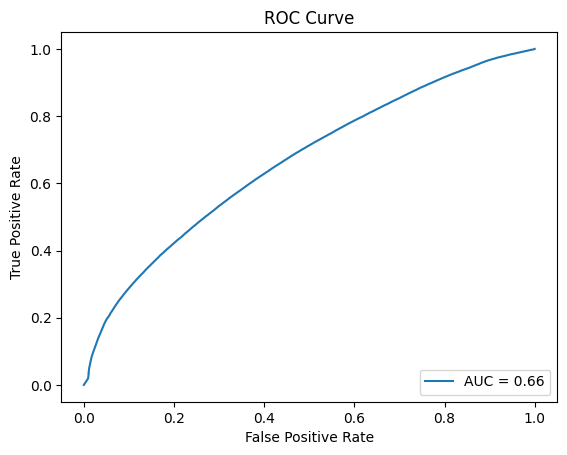

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print("\nAUC Score:", auc_score)

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
